In [44]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [45]:
# Download the data from the provided link
url = "https://data.nasa.gov/resource/y77d-th95.json"
response = requests.get(url)
data = response.json()
print(data)

[{'name': 'Aachen', 'id': '1', 'nametype': 'Valid', 'recclass': 'L5', 'mass': '21', 'fall': 'Fell', 'year': '1880-01-01T00:00:00.000', 'reclat': '50.775000', 'reclong': '6.083330', 'geolocation': {'type': 'Point', 'coordinates': [6.08333, 50.775]}}, {'name': 'Aarhus', 'id': '2', 'nametype': 'Valid', 'recclass': 'H6', 'mass': '720', 'fall': 'Fell', 'year': '1951-01-01T00:00:00.000', 'reclat': '56.183330', 'reclong': '10.233330', 'geolocation': {'type': 'Point', 'coordinates': [10.23333, 56.18333]}}, {'name': 'Abee', 'id': '6', 'nametype': 'Valid', 'recclass': 'EH4', 'mass': '107000', 'fall': 'Fell', 'year': '1952-01-01T00:00:00.000', 'reclat': '54.216670', 'reclong': '-113.000000', 'geolocation': {'type': 'Point', 'coordinates': [-113, 54.21667]}}, {'name': 'Acapulco', 'id': '10', 'nametype': 'Valid', 'recclass': 'Acapulcoite', 'mass': '1914', 'fall': 'Fell', 'year': '1976-01-01T00:00:00.000', 'reclat': '16.883330', 'reclong': '-99.900000', 'geolocation': {'type': 'Point', 'coordinates'

In [46]:
# Extract the relevant attributes from the data and create a list of dictionaries
def convert_data(data):
    converted_data = []
    for entry in data:
        converted_entry = {
            "Name of Earth Meteorite": entry.get("name", ""),
            "id": int(entry.get("id", 0)),
            "nametype": entry.get("nametype", ""),
            "recclass": entry.get("recclass", ""),
            "mass": float(entry.get("mass", 0)),
            "year": convert_to_datetime(entry.get("year", "")),
            "reclat": float(entry.get("reclat", 0)),
            "reclong": float(entry.get("reclong", 0)),
            "point coordinates": entry.get("geolocation", {}).get("coordinates", [])
        }
        converted_data.append(converted_entry)
    return converted_data
        
def convert_to_datetime(date_str):
    try:
        return datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S.%f')
    except ValueError:
        return None
    
structured_data = convert_data(data)

In [47]:
print(structured_data)

[{'Name of Earth Meteorite': 'Aachen', 'id': 1, 'nametype': 'Valid', 'recclass': 'L5', 'mass': 21.0, 'year': datetime.datetime(1880, 1, 1, 0, 0), 'reclat': 50.775, 'reclong': 6.08333, 'point coordinates': [6.08333, 50.775]}, {'Name of Earth Meteorite': 'Aarhus', 'id': 2, 'nametype': 'Valid', 'recclass': 'H6', 'mass': 720.0, 'year': datetime.datetime(1951, 1, 1, 0, 0), 'reclat': 56.18333, 'reclong': 10.23333, 'point coordinates': [10.23333, 56.18333]}, {'Name of Earth Meteorite': 'Abee', 'id': 6, 'nametype': 'Valid', 'recclass': 'EH4', 'mass': 107000.0, 'year': datetime.datetime(1952, 1, 1, 0, 0), 'reclat': 54.21667, 'reclong': -113.0, 'point coordinates': [-113, 54.21667]}, {'Name of Earth Meteorite': 'Acapulco', 'id': 10, 'nametype': 'Valid', 'recclass': 'Acapulcoite', 'mass': 1914.0, 'year': datetime.datetime(1976, 1, 1, 0, 0), 'reclat': 16.88333, 'reclong': -99.9, 'point coordinates': [-99.9, 16.88333]}, {'Name of Earth Meteorite': 'Achiras', 'id': 370, 'nametype': 'Valid', 'recclas

In [48]:
# Create a Pandas DataFrame from the structured data
df = pd.DataFrame(structured_data)

# Save the DataFrame to a CSV file
output_filename = "meteorite_data.csv"
df.to_csv(output_filename, index=False)
print("Data saved to", output_filename)

Data saved to meteorite_data.csv


Earth meteorites that fell before the year 2000: 929


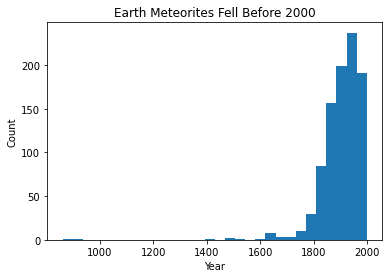

In [67]:
# Plot 1: Earth meteorites that fell before the year 2000
years = [item["year"].year for item in structured_data if item["year"] is not None and item["year"].year < 2000]
print("Earth meteorites that fell before the year 2000:",len(years))
plt.hist(years, bins=30)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Earth Meteorites Fell Before 2000")
plt.show()

Earth meteorites coordinates that fell before the year 1970: 780


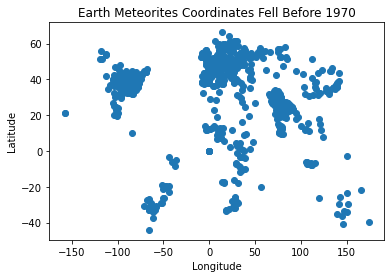

In [66]:
# Plot 2: Earth meteorites coordinates that fell before the year 1970
coordinates = [(float(item["reclong"]), float(item["reclat"])) for item in structured_data if item["year"] is not None and item["year"].year < 1970]
print("Earth meteorites coordinates that fell before the year 1970:",len(coordinates))
longitudes = [coord[0] for coord in coordinates]
latitudes = [coord[1] for coord in coordinates]
plt.scatter(longitudes, latitudes)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earth Meteorites Coordinates Fell Before 1970")
plt.show()

Earth meteorites with mass more than 10000kg: 243


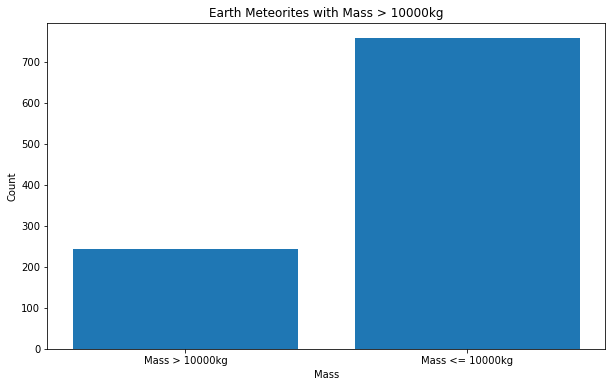

In [63]:
# Plot 3: Earth meteorites with mass more than 10000kg
masses = [item["mass"] for item in structured_data if item["mass"] is not None and item["mass"] > 10000]
print("Earth meteorites with mass more than 10000kg:", len(masses))
plot_3 = plt.figure(figsize=(10, 6))
plt.bar(["Mass > 10000kg", "Mass <= 10000kg"], [len(masses), len(structured_data) - len(masses)])
plt.xlabel("Mass")
plt.ylabel("Count")
plt.title("Earth Meteorites with Mass > 10000kg")
plt.show()